In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/streaming_titles_clean.csv")

print(len(data))
# print(data.columns)
data.tail()

9971


,type,title,director,cast,country,release_year,rating,duration,description,score,...,genre.Coming_of_Age,genre.Anthology,genre.Buddy,genre.Parody,genre.Spy/Espionage,genre.Survival,genre.Soap_Opera_/_Melodrama,genre.Dance,genre.Medical,genre.Disaster
9966,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2009,PG-13,108.0,Wolverine unites with legendary X-Men to fight...,54.0,...,False,False,False,False,False,False,False,False,False,False
9967,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2009,PG,106.0,Larry Daley returns to rescue some old friends...,51.0,...,False,False,False,False,False,False,False,False,False,False
9968,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2016,PG-13,107.0,"True story of Eddie Edwards, a British ski-jum...",68.0,...,False,False,False,False,False,False,False,False,False,False
9969,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2003,PG-13,112.0,Despite the wishes of their traditional famili...,71.0,...,True,False,True,False,False,False,False,False,False,False
9970,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,2012,TV-G,2.0,View one of Sparky's favorite home movies.,27.0,...,False,False,False,False,False,False,False,False,False,False


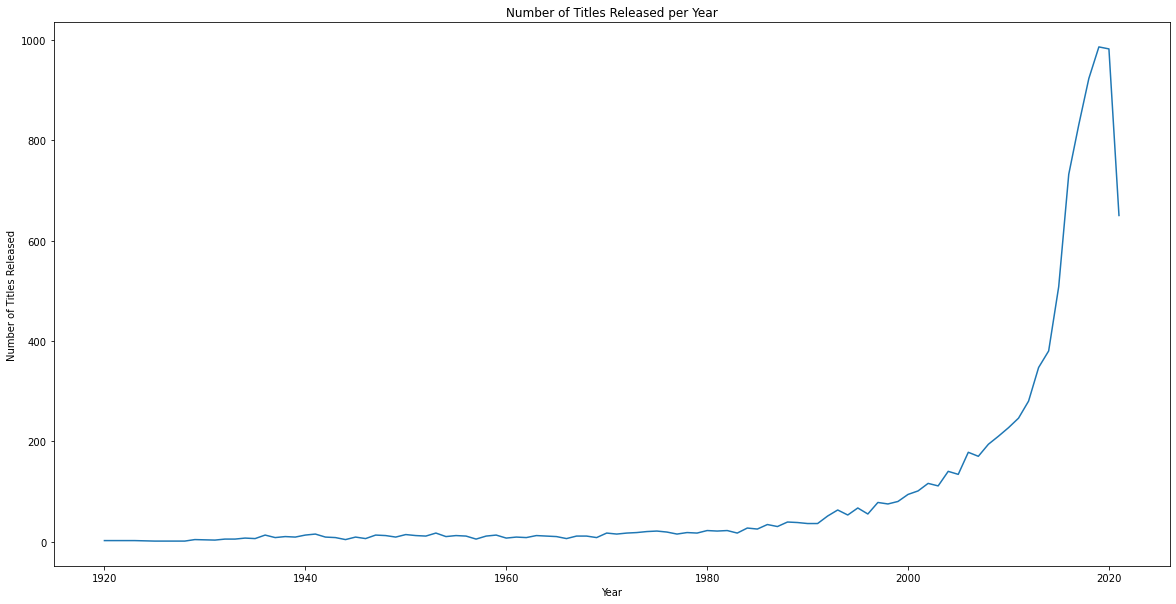

In [3]:
# 1. Line Chart of the Number of Titles Released per Year

# Group data by year and count number of titles
counts = data.groupby("release_year")["title"].count()

# Create line chart
plt.figure(figsize=(20,10))
plt.plot(counts.index, counts.values)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.title("Number of Titles Released per Year")

# Display chart
plt.show()

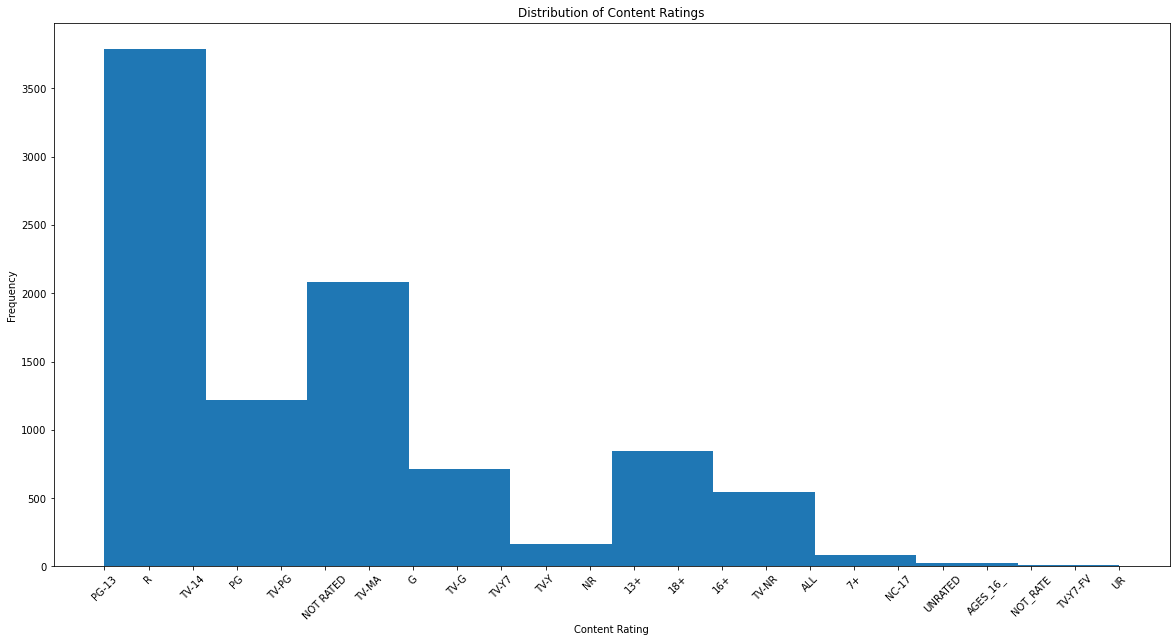

In [4]:
# 2. Histogram of the Distribution of Content Ratings

# Create histogram of content ratings
plt.figure(figsize=(20,10))
plt.hist(data["rating"].dropna(), bins=10)

# Add labels and title
plt.xlabel("Content Rating")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Distribution of Content Ratings")

# Display chart
plt.show()

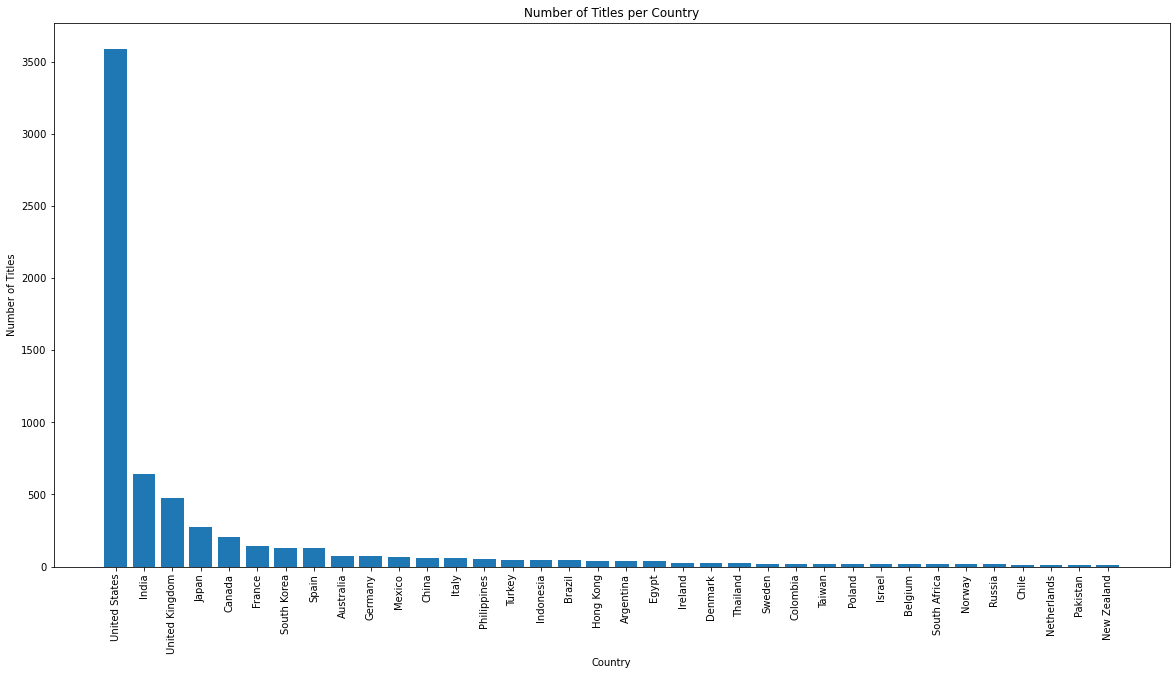

In [5]:
# 3. Bar Chart of the Number of Titles per Country (count > 10)

# Extract first country from country column
chart = data.copy()
chart["country"] = chart["country"].str.split(", ").str[0]

# Group data by country and count number of titles
counts = chart.groupby("country")["title"].count()
counts = counts[counts > 10].sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Number of Titles")
plt.title("Number of Titles per Country")

# Display chart
plt.show()

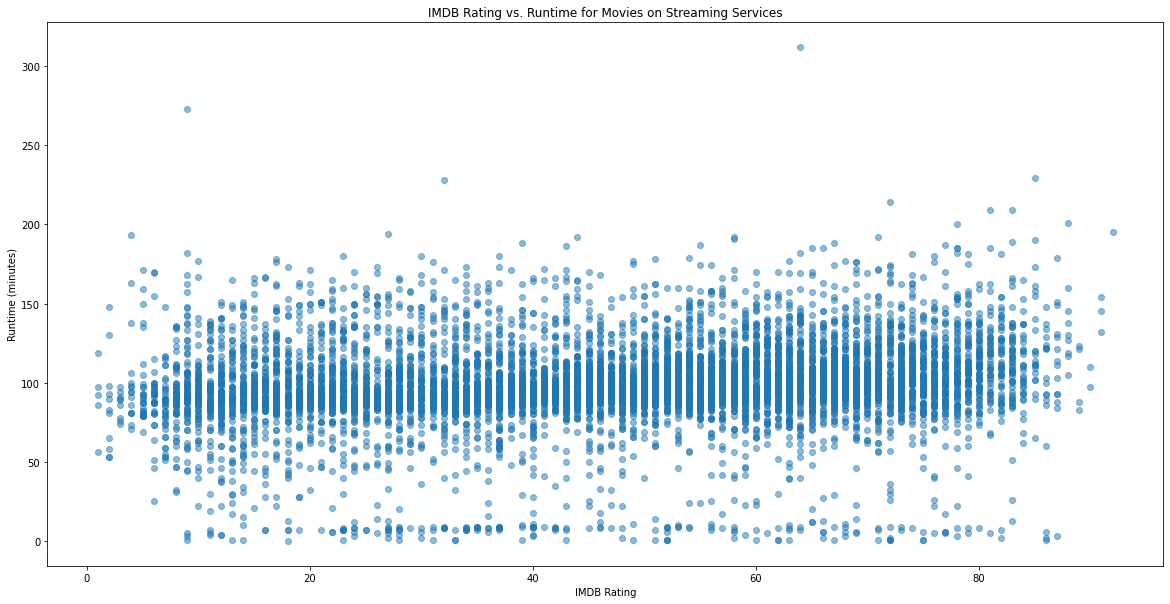

In [6]:
# 4. Movie and Rating Scatter Plot

# Filter out TV shows and missing ratings
movies = data[(data["type"] == "Movie") & (data["score"].notnull())]

# Create scatter plot of IMDB rating vs. runtime
plt.figure(figsize=(20,10))
plt.scatter(movies["score"], movies["duration"], alpha=0.5)

# Add labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Runtime (minutes)")
plt.title("IMDB Rating vs. Runtime for Movies on Streaming Services")

# Display chart
plt.show()

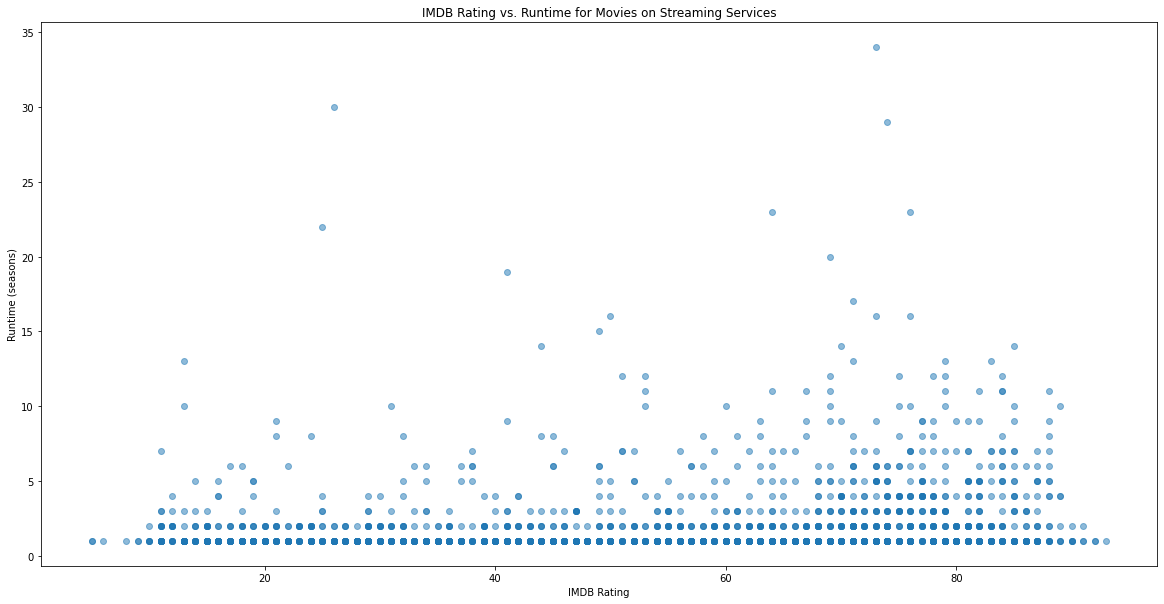

In [7]:
# 5. TV Show and Rating Scatter Plot

# Filter out Movies and missing ratings
tv = data[(data["type"] == "TV Show") & (data["score"].notnull())]

# Create scatter plot of IMDB rating vs. runtime
plt.figure(figsize=(20,10))
plt.scatter(tv["score"], tv["duration"], alpha=0.5)

# Add labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Runtime (seasons)")
plt.title("IMDB Rating vs. Runtime for Movies on Streaming Services")

# Display chart
plt.show()

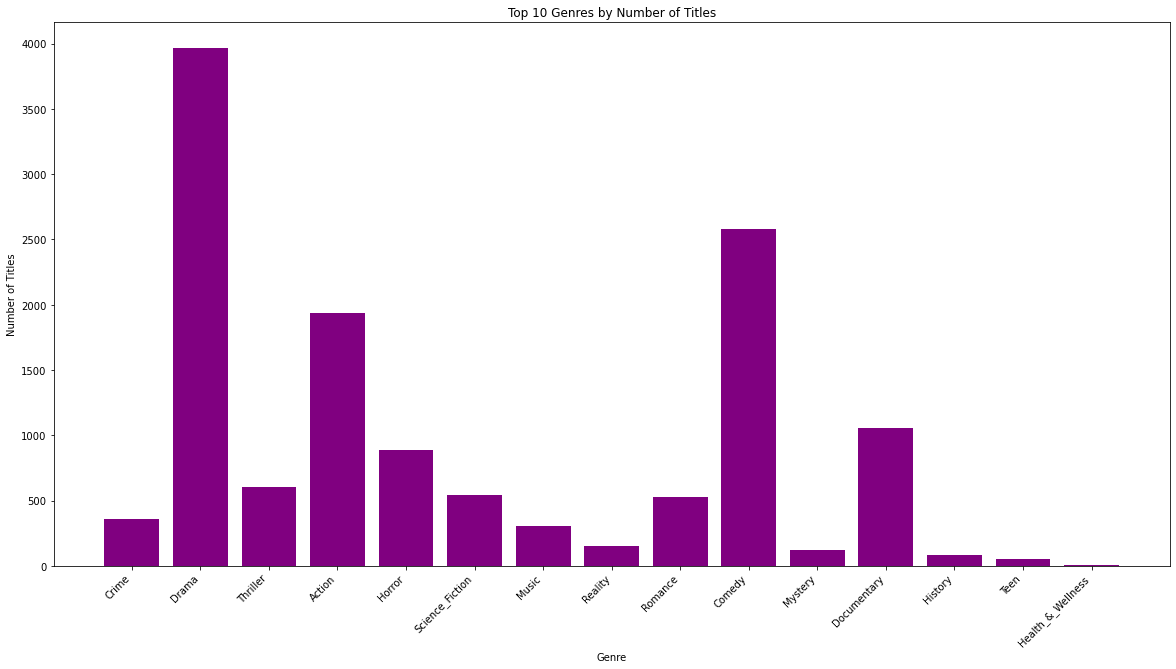

In [8]:
# 6. Top 15 Genres By Number of Titles

# Get list of genre columns
genre_cols = [col for col in data.columns if col.startswith("genre")]

# Sum the number of true values in each genre column to get the total number of titles for each genre
genre_counts = data[genre_cols].sum()#.sort_values(ascending=False)

# Get the top 10 genres by number of titles
top_genres = genre_counts[:15]

# Remove "genre." from the genre names in the x-axis labels
labels = [col.replace("genre.", "") for col in top_genres.index]

# Create bar chart
plt.figure(figsize=(20, 10))
plt.bar(labels, top_genres.values, color='purple')

# Add labels and title
plt.xlabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Titles")
plt.title("Top 10 Genres by Number of Titles")

# Display chart
plt.show()